# Plot ACE2 expression vs Infectivity

This notebook plots pseudovirus infectivity in HEK293T clones expressing different levels of ACE2.

In [1]:
import os
import warnings

import pandas as pd
from plotnine import *

import yaml

In [2]:
warnings.simplefilter('ignore')

In [3]:
with open('config.yaml') as f:
    config = yaml.safe_load(f)

In [4]:
resultsdir=config['resultsdir']
os.makedirs(resultsdir, exist_ok=True)

In [5]:
df = pd.read_csv(config['ACE2_expression_df'])
df

,cells,MFI (mode),RLU/ul,relative MFI,relative RLU/ul
0,high,60904,50877.35,1.000000,1.000000
1,medium,6344,39923.31,0.104164,0.784697
2,low,2255,8123.15,0.037025,0.159661
3,very low,1119,1830.92,0.018373,0.035987


In [6]:
cat_order = ['very low', 'low', 'medium', 'high']
df['cells'] = pd.Categorical(df['cells'], categories=cat_order, ordered=True)

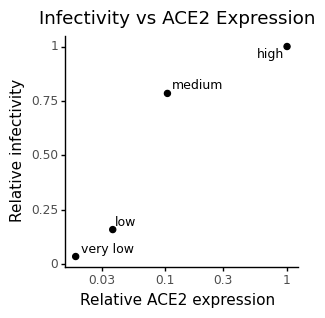

<ggplot: (8767542844139)>

In [7]:
(
    ggplot(df) +
    aes(x="relative MFI", y="relative RLU/ul") +
    geom_point(size=2) +
    geom_text(
        mapping=aes(label='cells'),
        ha='left',
        adjust_text={'expand_points': (1.2, 1.2)},
        size=9
              ) +   
    theme_classic() +
    theme(figure_size=(3,3)) +
    labs(
        title = "Infectivity vs ACE2 Expression",
        x="Relative ACE2 expression",
        y="Relative infectivity") +
    scale_x_log10()
)


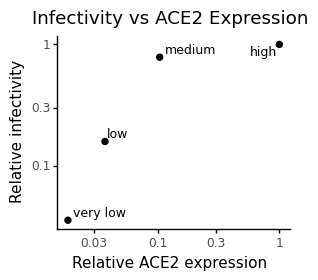

<ggplot: (8767534313710)>

In [8]:
# version with Y axis as log scale
(
    ggplot(df)+
    aes(x="relative MFI", y="relative RLU/ul") +
    geom_point(size=2) +
    geom_text(
        mapping=aes(label='cells'),
        ha='left',
        adjust_text={'expand_points': (1.2, 1.2)},
        size=9
              ) +
    theme_classic()+
    theme(figure_size=(3,3)) +
    labs(
        title = "Infectivity vs ACE2 Expression",
        x="Relative ACE2 expression",
        y="Relative infectivity"
    ) +
    scale_x_log10() +
    scale_y_log10() +
    coord_fixed(ratio = 1)
)


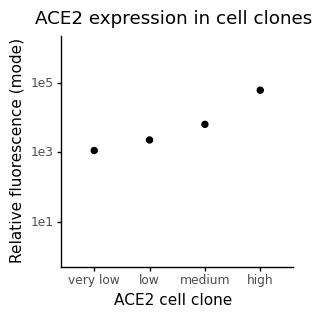

<ggplot: (8767534243889)>

In [9]:
#ACE2 expression plot for figure 1
(
    ggplot(df)+
    aes(x="cells", y="MFI (mode)") +
    geom_point(size=2) +
    theme_classic()+
    theme(figure_size=(3,3))+
    scale_y_log10(limits=[1,1.1e6])+
    xlab('ACE2 cell clone') +
    scale_y_log10(limits=[1,1.1e6]) +
    labs(y ='Relative fluorescence (mode)',
        title ='ACE2 expression in cell clones')
)